Juego

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from typing import Optional, List, Tuple

In [2]:
class GameOfLife:
    def __init__(self, rows: int, cols: int, initial_state: Optional[np.ndarray] = None):
        """
        Inicializa el tablero del Juego de la Vida.
        
        Args:
            rows: Número de filas del tablero.
            cols: Número de columnas del tablero.
            initial_state: Estado inicial del tablero (opcional). 
            Si es None, se genera un estado aleatorio.
        """
        self.rows = rows
        self.cols = cols
        
        if initial_state is None:
            self.board = np.random.choice([0, 1], size=(rows, cols))
        else:
            if initial_state.shape != (rows, cols):
                raise ValueError("Las dimensiones del estado inicial no coinciden con rows y cols")
            self.board = initial_state.copy()
    
    def count_neighbors(self, x: int, y: int) -> int:
        """
        Cuenta el número de vecinos vivos para una celda dada.
        
        Args:
            x: Coordenada x (fila) de la celda.
            y: Coordenada y (columna) de la celda.
            
        Returns:
            Número de vecinos vivos (0-8).
        """
        neighbors = 0
        for i in [-1, 0, 1]:
            for j in [-1, 0, 1]:
                if i == 0 and j == 0:
                    continue  # Saltar la celda actual
                # Usar condiciones periódicas (toroidal)
                nx, ny = (x + i) % self.rows, (y + j) % self.cols
                neighbors += self.board[nx, ny]
        return neighbors
    
    def step(self) -> None:
        """
        Actualiza el tablero según las reglas del Juego de la Vida.
        """
        new_board = np.zeros((self.rows, self.cols), dtype=int)
        
        for i in range(self.rows):
            for j in range(self.cols):
                neighbors = self.count_neighbors(i, j)
                
                # Aplicar reglas del Juego de la Vida
                if self.board[i, j] == 1:  # Celda viva
                    if neighbors < 2 or neighbors > 3:
                        new_board[i, j] = 0  # Muere por soledad o superpoblación
                    else:
                        new_board[i, j] = 1  # Sobrevive
                else:  # Celda muerta
                    if neighbors == 3:
                        new_board[i, j] = 1  # Nace por reproducción
        
        self.board = new_board
    
    def run(self, steps: int) -> None:
        """
        Ejecuta múltiples pasos del juego.
        
        Args:
            steps: Número de pasos a ejecutar.
        """
        for _ in range(steps):
            self.step()
    
    def get_state(self) -> np.ndarray:
        """
        Devuelve el estado actual del tablero.
        
        Returns:
            Matriz que representa el estado actual del tablero.
        """
        return self.board.copy()
    
    def animate(self, frames: int, interval: int = 200) -> animation.FuncAnimation:
        """
        Crea una animación del Juego de la Vida.
        
        Args:
            frames: Número de cuadros (generaciones) a animar.
            interval: Intervalo entre cuadros en milisegundos.
            
        Returns:
            Objeto de animación de matplotlib.
        """
        fig, ax = plt.subplots()
        img = ax.imshow(self.board, cmap='binary', interpolation='nearest')
        plt.title("Juego de la Vida de Conway")
        
        def update(frame):
            self.step()
            img.set_array(self.board)
            return [img]
        
        ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
        return ani

Funciones para patrones clásicos

In [3]:

def create_glider(rows: int, cols: int) -> np.ndarray:
    """Crea un tablero con un planeador (glider) en la esquina superior izquierda."""
    board = np.zeros((rows, cols), dtype=int)
    if rows >= 3 and cols >= 3:
        board[0:3, 0:3] = [[0, 1, 0],
                           [0, 0, 1],
                           [1, 1, 1]]
    return board

def create_blinker(rows: int, cols: int) -> np.ndarray:
    """Crea un tablero con un parpadeador (blinker) en el centro."""
    board = np.zeros((rows, cols), dtype=int)
    center_row, center_col = rows // 2, cols // 2
    if rows >= 3 and cols >= 3:
        board[center_row, center_col-1:center_col+2] = 1
    return board

def create_random(rows: int, cols: int, density: float = 0.2) -> np.ndarray:
    """Crea un tablero con celdas aleatorias."""
    return np.random.choice([0, 1], size=(rows, cols), p=[1-density, density])


Medicion de Rendimiento

In [4]:
def performance_test(max_power: int = 10, samples: int = 5) -> Tuple[List[int], List[float]]:
    """
    Realiza pruebas de rendimiento para diferentes tamaños de tablero.
    
    Args:
        max_power: Tamaño máximo como potencia de 2 (2^max_power).
        samples: Número de muestras por tamaño.
        
    Returns:
        sizes: Lista de tamaños probados (número de celdas).
        times: Lista de tiempos promedio por iteración.
    """
    sizes = []
    times = []
    
    for power in range(5, max_power + 1):
        size = 2 ** power
        total_time = 0.0
        
        for _ in range(samples):
            game = GameOfLife(size, size)
            
            start_time = time.time()
            game.run(10)  # Ejecutar 10 pasos
            elapsed = time.time() - start_time
            
            total_time += elapsed / 10  # Tiempo promedio por paso
        
        avg_time = total_time / samples
        sizes.append(size * size)  # Número total de celdas
        times.append(avg_time)
        
        print(f"Tamaño: {size}x{size}, Celdas: {size*size}, Tiempo/iteración: {avg_time:.6f}s")
    
    return sizes, times

def plot_performance(sizes: List[int], times: List[float]) -> None:
    """Grafica los resultados de rendimiento en escala normal y log-log."""
    plt.figure(figsize=(12, 5))
    
    # Gráfica normal
    plt.subplot(1, 2, 1)
    plt.plot(sizes, times, 'o-')
    plt.xlabel('Número de celdas')
    plt.ylabel('Tiempo por iteración (s)')
    plt.title('Rendimiento del Juego de la Vida')
    plt.grid(True)
    
    # Gráfica log-log
    plt.subplot(1, 2, 2)
    plt.loglog(sizes, times, 'o-')
    plt.xlabel('Número de celdas (log)')
    plt.ylabel('Tiempo por iteración (log)')
    plt.title('Rendimiento (escala log-log)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


Ejemplo de Uso

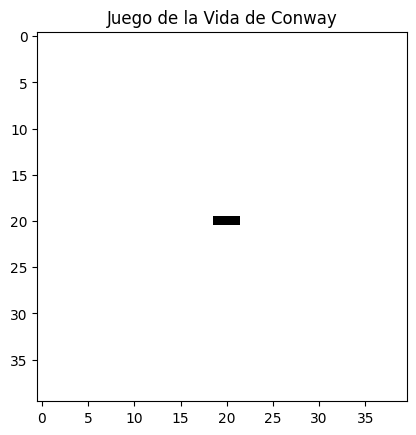

In [17]:
if __name__ == "__main__":
    # Ejemplo con un planeador
    rows, cols = 40, 40
    #initial_state = create_glider(rows, cols)
    initial_state = create_blinker(rows, cols)
    #initial_state = create_random(rows, cols, density=0.5)
    game = GameOfLife(rows, cols, initial_state)
    
    # Crear animación
    ani = game.animate(frames=45)
    plt.show()

Tamaño: 32x32, Celdas: 1024, Tiempo/iteración: 0.007240s
Tamaño: 64x64, Celdas: 4096, Tiempo/iteración: 0.015763s
Tamaño: 128x128, Celdas: 16384, Tiempo/iteración: 0.060905s
Tamaño: 256x256, Celdas: 65536, Tiempo/iteración: 0.250417s


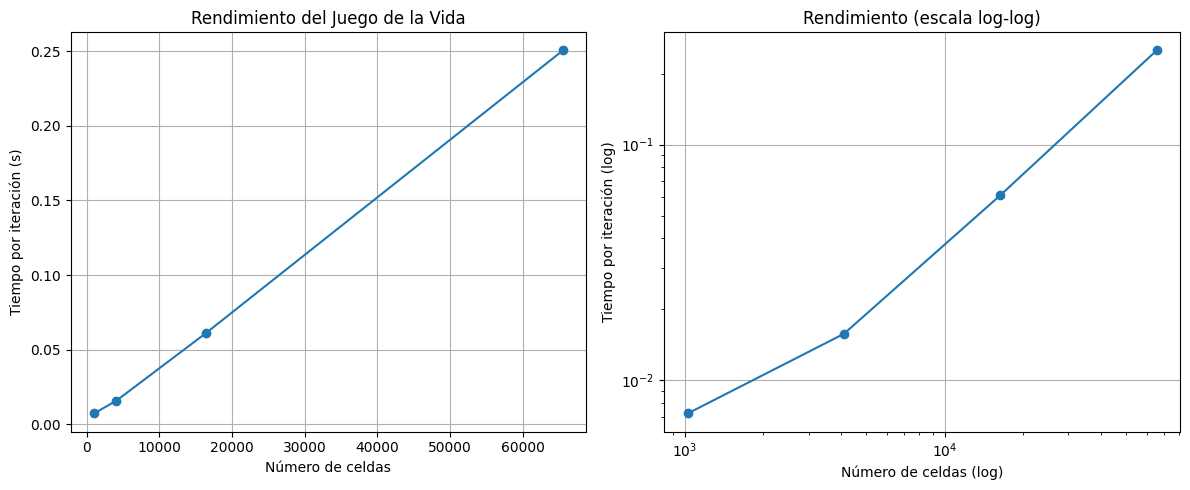

In [16]:
    # Pruebas de rendimiento
sizes, times = performance_test(max_power=8)  # Hasta 256x256
plot_performance(sizes, times)